## All Gear data

In [10]:
# import statements

import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas import Series

from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation


In [2]:
# Function to make the time-series continuous 
def UpdateTime(x1, x2):
    max_time = max(x1['t'])
    x2['t'] = x2['t'] + max_time

# Read the Gear2 data
X2_Gear2 = pd.read_csv('./Gear2/segment2.csv');
X3_Gear2 = pd.read_csv('./Gear2/segment3.csv');
X4_Gear2 = pd.read_csv('./Gear2/segment4.csv');
X5_Gear2 = pd.read_csv('./Gear2/segment5.csv');
X6_Gear2 = pd.read_csv('./Gear2/segment6.csv');

# Call UpdateTime for Gear2 segments
UpdateTime(X2_Gear2, X3_Gear2);
UpdateTime(X3_Gear2, X4_Gear2);
UpdateTime(X4_Gear2, X5_Gear2);
UpdateTime(X5_Gear2, X6_Gear2);

# Combine the Gear2 Segments
X_Gear2 = pd.concat((X2_Gear2,X3_Gear2,X4_Gear2,X5_Gear2), axis=0)
# Set Y label for Gear2 data
Y_Gear2 = pd.DataFrame(data = np.full((X_Gear2.shape[0],1), 2));

#####################
# Read the Gear3 data
X1_Gear3 = pd.read_csv('./Gear3/segment1.csv');
X2_Gear3 = pd.read_csv('./Gear3/segment2.csv');
X3_Gear3 = pd.read_csv('./Gear3/segment3.csv');
X4_Gear3 = pd.read_csv('./Gear3/segment4.csv');
X5_Gear3 = pd.read_csv('./Gear3/segment5.csv');
X6_Gear3 = pd.read_csv('./Gear3/segment6.csv');

# Call UpdateTime for Gear3 segments
UpdateTime(X6_Gear2, X1_Gear3);
UpdateTime(X2_Gear3, X3_Gear3);
UpdateTime(X3_Gear3, X4_Gear3);
UpdateTime(X4_Gear3, X5_Gear3);
UpdateTime(X5_Gear3, X6_Gear3);

# Combine the Gear3 Segments
X_Gear3 = pd.concat((X1_Gear3, X2_Gear3,X3_Gear3,X4_Gear3,X5_Gear3), axis=0)
# Set Y label for Gear3 data
Y_Gear3 = pd.DataFrame(data = np.full((X_Gear3.shape[0],1), 2));


#####################
# Read the Gear4 data
X2_Gear4 = pd.read_csv('./Gear4/segment2.csv');
X3_Gear4 = pd.read_csv('./Gear4/segment3.csv');
X4_Gear4 = pd.read_csv('./Gear4/segment4.csv');
X5_Gear4 = pd.read_csv('./Gear4/segment5.csv');
X6a_Gear4 = pd.read_csv('./Gear4/segment6a.csv');
X6b_Gear4 = pd.read_csv('./Gear4/segment6b.csv')

# Call UpdateTime for Gear4 segments
UpdateTime(X6_Gear3, X2_Gear4);
UpdateTime(X2_Gear4, X3_Gear4);
UpdateTime(X3_Gear4, X4_Gear4);
UpdateTime(X4_Gear4, X5_Gear4);
UpdateTime(X5_Gear4, X6a_Gear4);
UpdateTime(X6b_Gear4, X6b_Gear4);

# Combine the Gear4 Segments
X_Gear4 = pd.concat((X2_Gear4,X3_Gear4,X4_Gear4,X5_Gear4, X6a_Gear4, X6b_Gear4), axis=0)
# Set Y label for Gear4 data
Y_Gear4 = pd.DataFrame(data = np.full((X_Gear4.shape[0],1), 2));


#####################
# Read the Gear5/Double data
X1_Double = pd.read_csv('./Double/segment1.csv');
X2_Double = pd.read_csv('./Double/segment2.csv');
X3_Double = pd.read_csv('./Double/segment3.csv');
X4_Double = pd.read_csv('./Double/segment4.csv');
X5_Double = pd.read_csv('./Double/segment5.csv');
X6_Double = pd.read_csv('./Double/segment7.csv');


# Call UpdateTime for Gear5 segments
UpdateTime(X6b_Gear4, X1_Double);
UpdateTime(X1_Double, X2_Double);
UpdateTime(X2_Double, X3_Double);
UpdateTime(X3_Double, X4_Double);
UpdateTime(X4_Double, X5_Double);
UpdateTime(X5_Double, X6_Double);

# Combine the Gear5 Segments
X_Double = pd.concat((X1_Double,X2_Double,X3_Double,X4_Double, X5_Double, X6_Double), axis=0)
# Set Y label for Gear5 data
Y_Double = pd.DataFrame(data = np.full((X_Double.shape[0],1), 2));

X = pd.concat((X_Gear2, X_Gear3, X_Gear4, X_Double), axis = 0);
Y = pd.concat((Y_Gear2, Y_Gear3, Y_Gear4, Y_Double), axis = 0);

# Set column 't' as index of the dataframe
X.set_index('t', inplace=True);

# First few rows of the combined dataset
print(X.head());

# Get feature names
features = list(X.columns);

print(features);


       fL   thL    w1L    w2L    w3L   a1L   a2L   a3L   fR   thR    w1R  \
t                                                                          
0.00  0.1  51.6  0.193  0.321  0.015  2.90 -6.44 -5.81  0.2  36.4  0.205   
0.02  0.2  51.8  0.205  0.196 -0.028  3.19 -6.65 -5.96  0.1  36.9  0.317   
0.04  0.1  52.0  0.206  0.185 -0.056  3.38 -6.72 -6.13  0.1  37.0  0.403   
0.06  0.2  52.1  0.183  0.256 -0.066  3.32 -6.60 -6.05  0.1  36.8  0.452   
0.08  0.2  52.2  0.125  0.224 -0.090  2.98 -6.39 -5.56  0.1  36.3  0.418   

        w2R    w3R   a1R   a2R   a3R    x    y     v   vdir  
t                                                            
0.00  4.553  1.404  2.89 -5.34 -7.04  5.3  6.7  0.64  127.0  
0.02  3.947  1.344  1.03 -5.38 -5.09  5.3  6.6  0.64  127.1  
0.04  3.201  1.258 -0.24 -5.43 -2.84  5.4  6.6  0.64  127.1  
0.06  2.655  1.171 -0.76 -5.51 -0.51  5.4  6.6  0.64  127.1  
0.08  2.355  1.108 -1.35 -5.04  1.89  5.4  6.6  0.64  127.1  
['fL', 'thL', 'w1L', 'w2L', 'w3L'

20 Features :  ['fL', 'thL', 'w1L', 'w2L', 'w3L', 'a1L', 'a2L', 'a3L', 'fR', 'thR', 'w1R', 'w2R', 'w3R', 'a1R', 'a2R', 'a3R', 'x', 'y', 'v', 'vdir']
Histogram


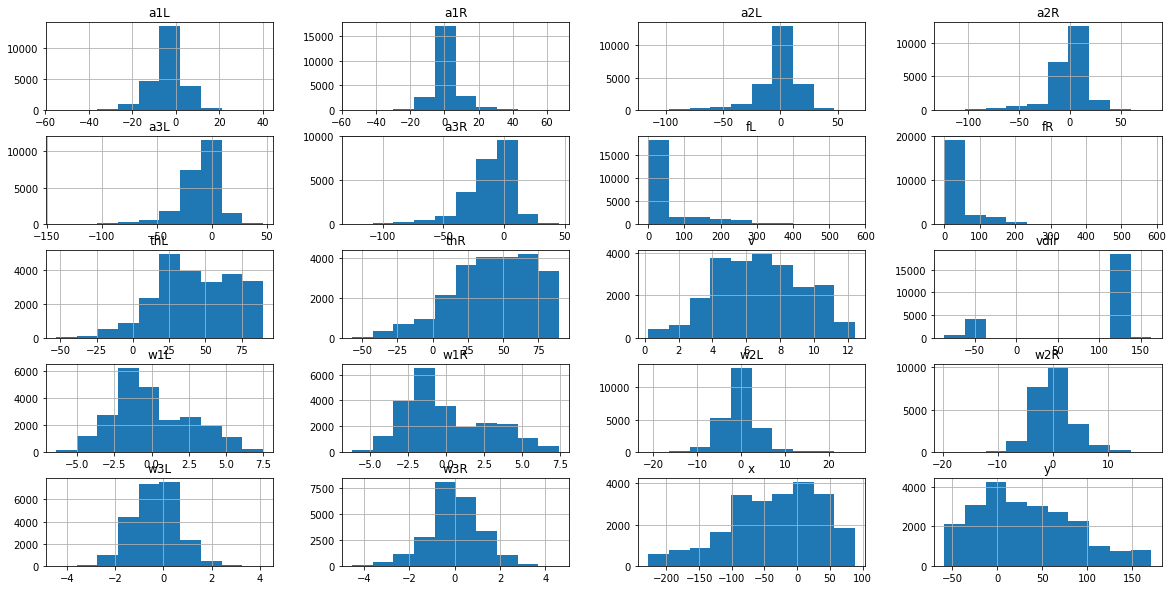

[[ 1.000e-01  5.160e+01  1.930e-01 ...  6.700e+00  6.400e-01  1.270e+02]
 [ 2.000e-01  5.180e+01  2.050e-01 ...  6.600e+00  6.400e-01  1.271e+02]
 [ 1.000e-01  5.200e+01  2.060e-01 ...  6.600e+00  6.400e-01  1.271e+02]
 ...
 [ 2.000e-01  4.620e+01  3.148e+00 ... -2.900e+00  2.660e+00  1.347e+02]
 [ 2.000e-01  5.000e+01  3.258e+00 ... -2.900e+00  2.660e+00  1.347e+02]
 [ 2.000e-01  5.390e+01  3.306e+00 ... -2.900e+00  2.650e+00  1.347e+02]]
Plotting each feature(column)


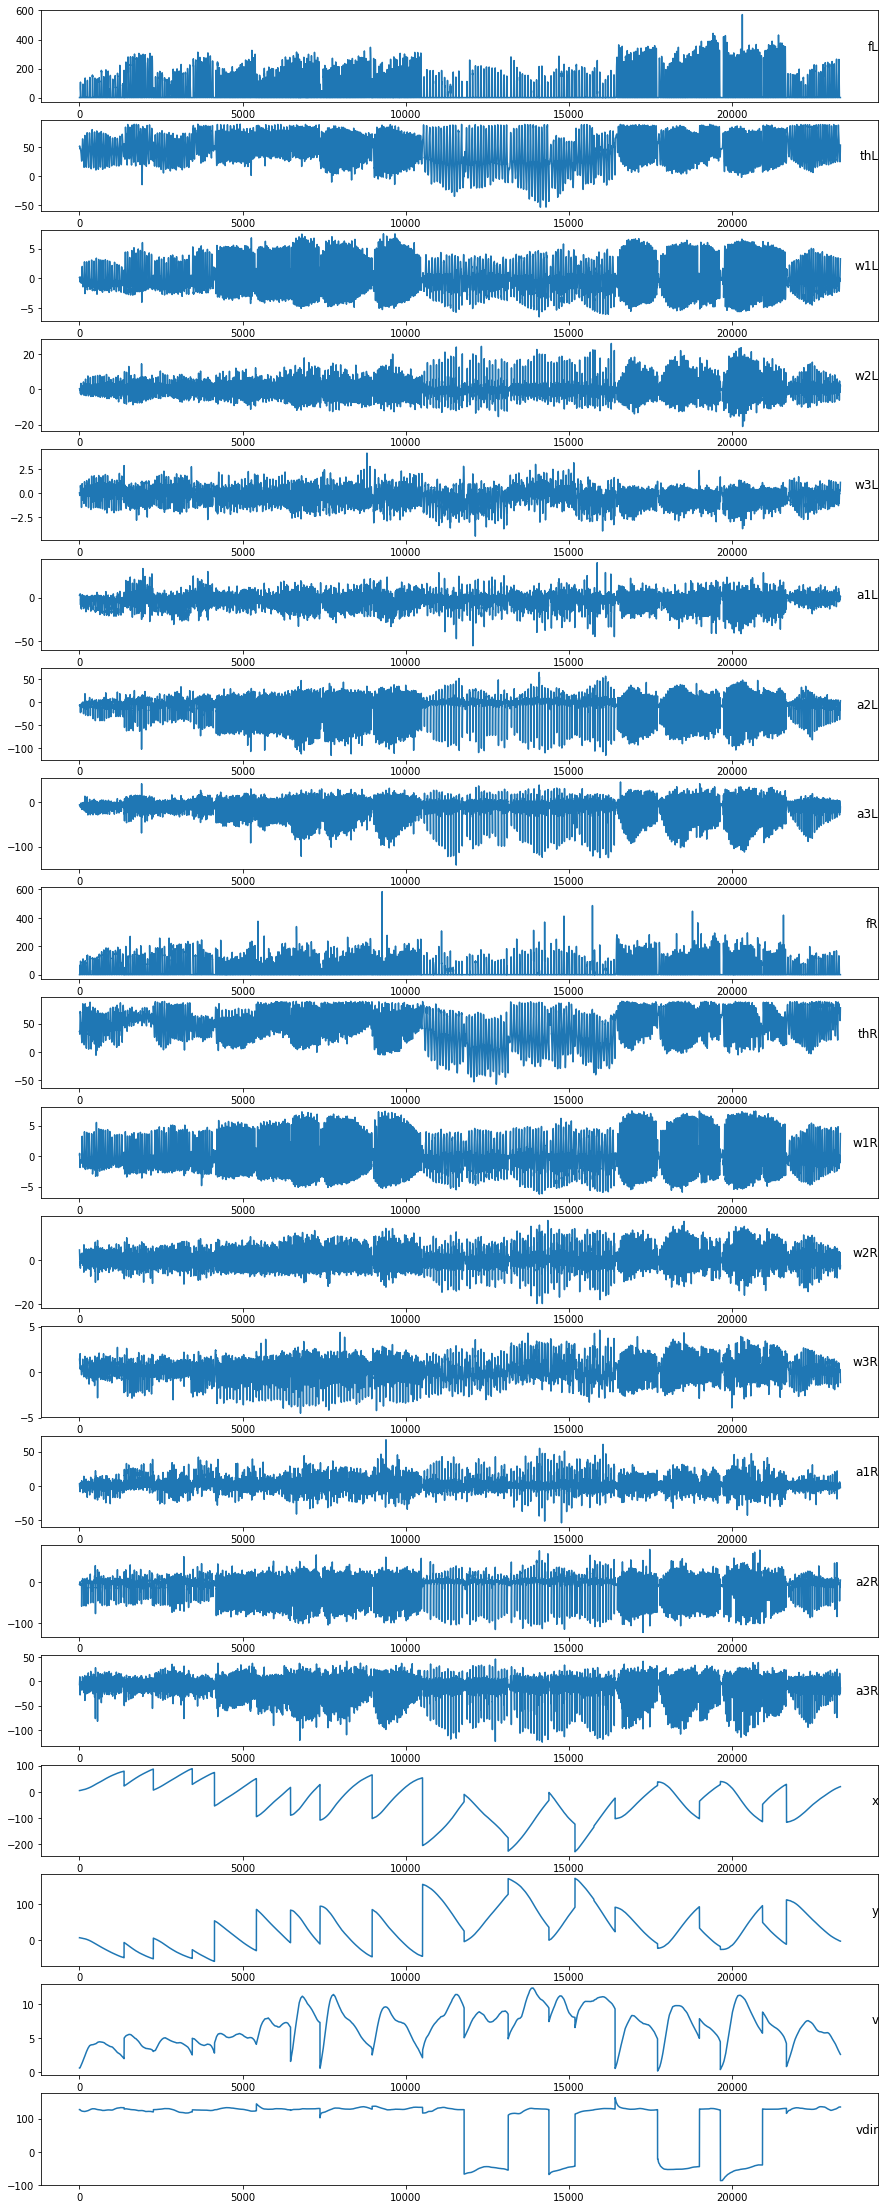

In [3]:
# Visualization
print('20 Features : ', features)

# Histogram
print('Histogram');
X.hist(figsize = (20,10));
pyplot.show()

# specify columns to plot
groups = [i for i in range(20)];
values = X.values;
print(values)
i = 1
# plot each column
print('Plotting each feature(column)');
pyplot.figure(figsize = (15,40))
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(X.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [4]:
# Feature normalization
# Normalize Time Series Data
# Source : https://machinelearningmastery.com/normalize-standardize-time-series-data-python/

# Normalization is a rescaling of the data from the original range so that all values are within the range of 0 and 1.
# useful when your time series data has input values with differing scales.

for i in range(len(features)):
    feature = features[i];
    print('Scaling feature : ', features[i])
    values = X[feature].values.reshape(-1,1);
    values = values.astype('float32');
    scaler = MinMaxScaler(feature_range = (0,1));
    scaled_f = scaler.fit_transform(values);
    X[feature] = scaled_f;



Scaling feature :  fL
Scaling feature :  thL
Scaling feature :  w1L
Scaling feature :  w2L
Scaling feature :  w3L
Scaling feature :  a1L
Scaling feature :  a2L
Scaling feature :  a3L
Scaling feature :  fR
Scaling feature :  thR
Scaling feature :  w1R
Scaling feature :  w2R
Scaling feature :  w3R
Scaling feature :  a1R
Scaling feature :  a2R
Scaling feature :  a3R
Scaling feature :  x
Scaling feature :  y
Scaling feature :  v
Scaling feature :  vdir


Histogram


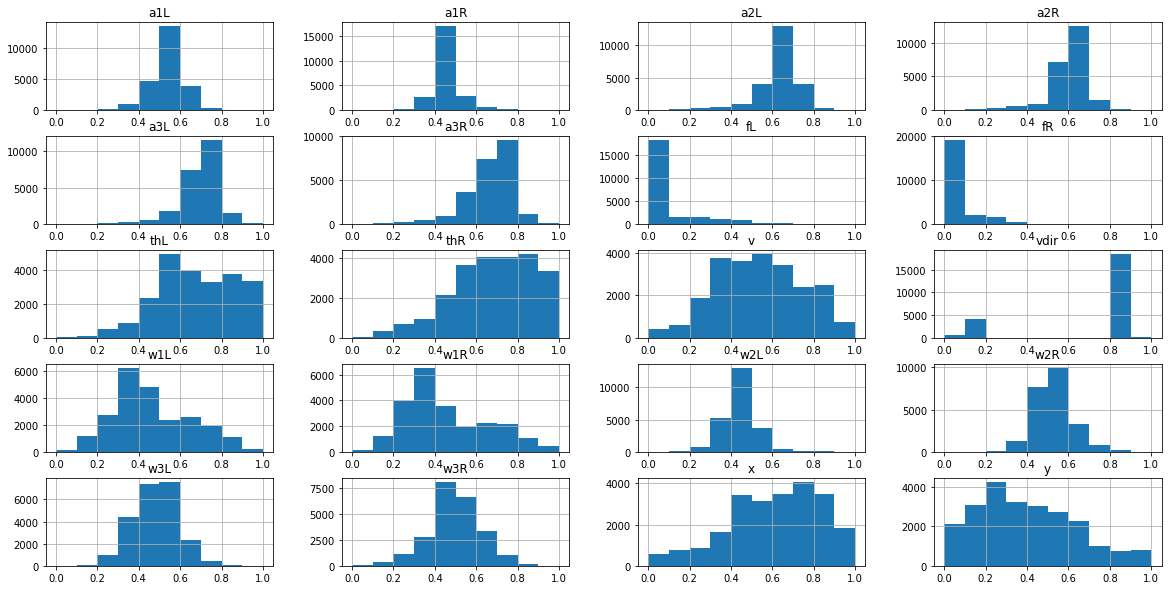

Plotting each feature(column)


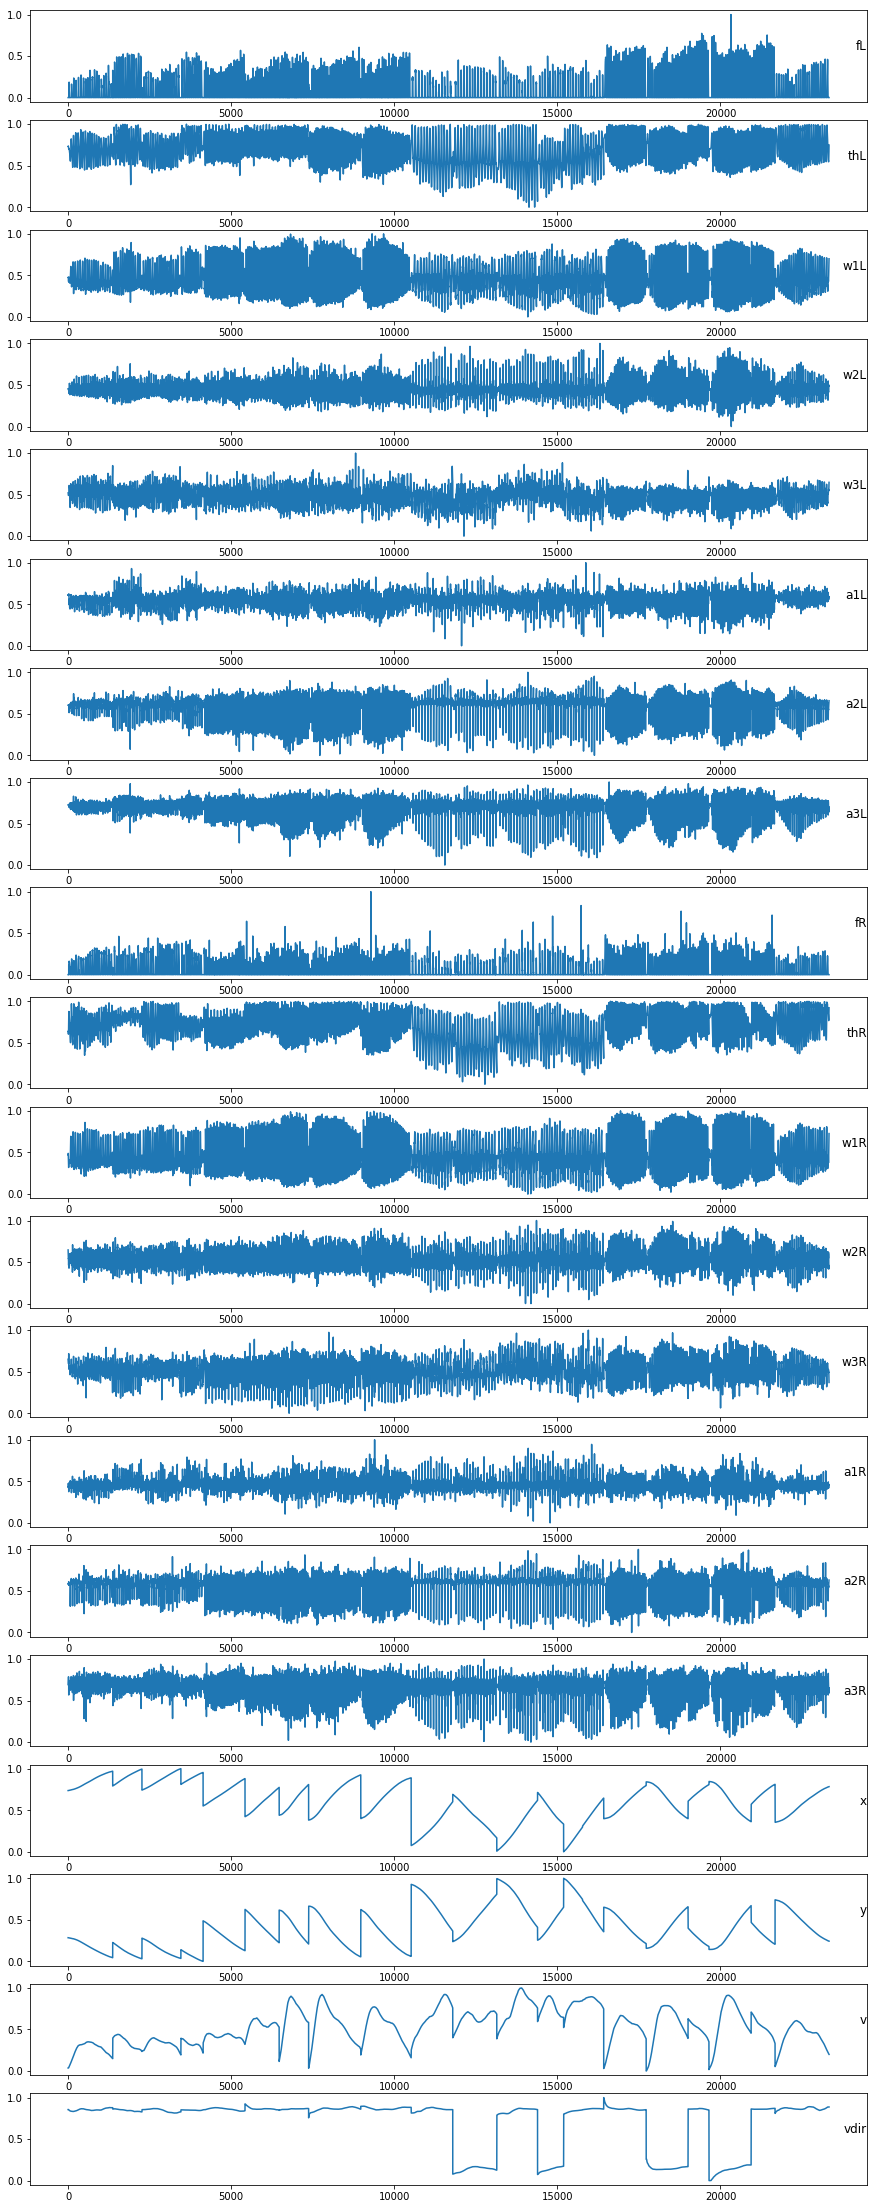

In [5]:
# Visulaization after normalization

# Histogram
print('Histogram');
# df = df.set_index(df['t']);
X.hist(figsize = (20,10));
pyplot.show()

# specify columns to plot
groups = [i for i in range(20)];
values = X.values;
i = 1
# plot each column
print('Plotting each feature(column)');
pyplot.figure(figsize = (15,40))
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(X.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show();

In [6]:
# Combine X and corresponding Y data

X_data = X;
Y_data = Y;

join = X.join(Y);

# join = df.join(Y);
print(join.columns);

Index([  'fL',  'thL',  'w1L',  'w2L',  'w3L',  'a1L',  'a2L',  'a3L',   'fR',
        'thR',  'w1R',  'w2R',  'w3R',  'a1R',  'a2R',  'a3R',    'x',    'y',
          'v', 'vdir',      0],
      dtype='object')


In [7]:
# Create train, test, validation data
# The fast and powerful methods that we rely on in machine learning, 
# such as using train-test splits and k-fold cross validation, do not work in the case of time series data. 
# This is because they ignore the temporal components inherent in the problem.

# Source : https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/

# For time series data, the time dimension of observations means that we cannot randomly split them into groups. 
# Instead, we must split data up and respect the temporal order in which values were observed.
# In time series forecasting, this evaluation of models on historical data is called backtesting. 

join_x = join.values;

print(join.shape);

train_size = int(len(join_x) * 0.8)
train, test = join_x[0:train_size], join_x[train_size:len(join_x)]
print('Observations: %d' % (len(join_x)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

trainX, trainY = train[:, 0:-1], train[:, -1];
testX, testY = test[:, 0:-1], test[:, -1];

print(trainX.shape);
print(trainY.shape);
print(testX.shape);
print(testY.shape);

timesteps = 1;
trainX = trainX.reshape(trainX.shape[0], timesteps, trainX.shape[1]);
testX = testX.reshape(testX.shape[0], timesteps, testX.shape[1]);

# print(trainX.shape);
# print(trainY.shape);
# print(testX.shape);
# print(testY.shape);

(24485, 21)
Observations: 24485
Training Observations: 19588
Testing Observations: 4897
(19588, 20)
(19588,)
(4897, 20)
(4897,)


In [18]:
# design and fit our LSTM network

model = Sequential();
model.add(LSTM(5, input_shape = (trainX.shape[1], trainX.shape[2])));
model.add(Dense(1));
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
model.fit(trainX, trainY, epochs=20, batch_size=100, validation_split=0.20)


ValueError: You are passing a target array of shape (19588, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.

In [19]:
# Evaluate the model

yhat = model.predict(testX);
print(yhat[55])

[1.]
